# Dependencies

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install scipy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Ex 1.
Select the first 8 features and remove duplicates and null values. Normalize the data \
using MinMaxScaler. Using $\texttt{sklearn}$, apply $k$-means randomly initialized, \
using $\texttt{max\_iter = 500}$ and $\texttt{random\_state = 42}$. Plot the different \
sum of squared errors (SSE) using the $\texttt{\_inertia}$ attribute of $k$-means according to the number of clusters.

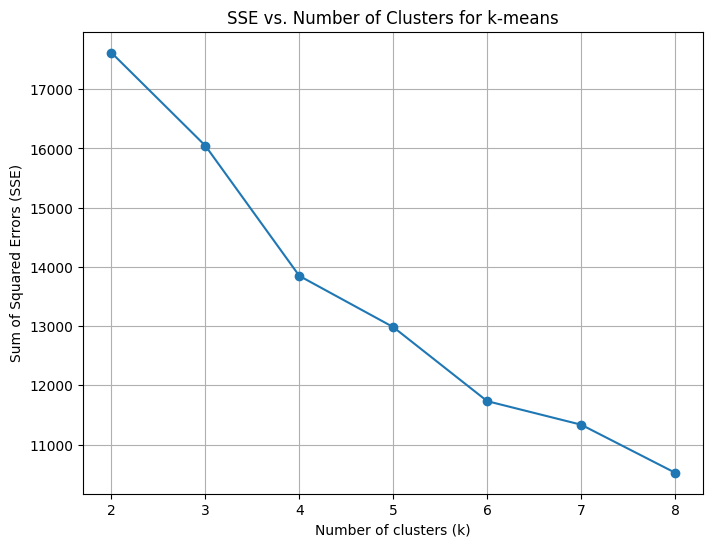

In [8]:
# Ex 1# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar o dataset
file_path = 'accounts.csv'
df = pd.read_csv(file_path)

# Selecionar as primeiras 8 features
df_selected = df.iloc[:, :8]

# Remover duplicados e valores nulos
df_cleaned = df_selected.drop_duplicates().dropna()

# Converter as variáveis categóricas em variáveis dummy
df_dummies = pd.get_dummies(df_cleaned, drop_first=True)

# Normalizar os dados usando o MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_dummies)

# Definir os valores de k
k_values = [2, 3, 4, 5, 6, 7, 8]
sse = []

# Aplicar k-means clustering para cada valor de k e armazenar o SSE (inércia)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

# Plotar os erros quadráticos somados (SSE)
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters for k-means')
plt.grid(True)
plt.show()


# Ex 2.
According to the previous plot, how many underlying customer segments (clusters) \
should there be ? Explain based on the trade off between the clusters and inertia.

> Refer to the report for the justification

NameError: name 'data' is not defined

# Ex 3.
Would $k$-modes be a better clustering approach? Explain why based on the dataset features.

> Refer to the report for the justification

In [ ]:
# Ex 3

# Ex 4.
Apply PCA to the data :

> Refer to the report for the justifications

### a)
Use $\texttt{StandardScaler}$ to scale the data before you apply $\texttt{fit\_transform}$. \
How much variability is explained by the top 2 components?

In [9]:
# Ex 4.a

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar o dataset
file_path = 'accounts.csv'
df = pd.read_csv(file_path)

# Selecionar as primeiras 8 features
df_selected = df.iloc[:, :8]

# Remover duplicados e valores nulos
df_cleaned = df_selected.drop_duplicates().dropna()

# Converter as variáveis categóricas em variáveis dummy
df_dummies = pd.get_dummies(df_cleaned, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Get variance explained by first 2 components
variance_first_2 = np.sum(explained_variance_ratio[:2])

print(f"Variance explained by first 2 components: {variance_first_2:.4f}")
print(f"Individual component variances:")
print(f"PC1: {explained_variance_ratio[0]:.4f}")
print(f"PC2: {explained_variance_ratio[1]:.4f}")

Variance explained by first 2 components: 0.2276
Individual component variances:
PC1: 0.1168
PC2: 0.1108


### b)
Provide a scatterplot according to the first 2 principal components and color the \
points according to $k=3$ clusters. Can we clearly separate the clusters? Justify.

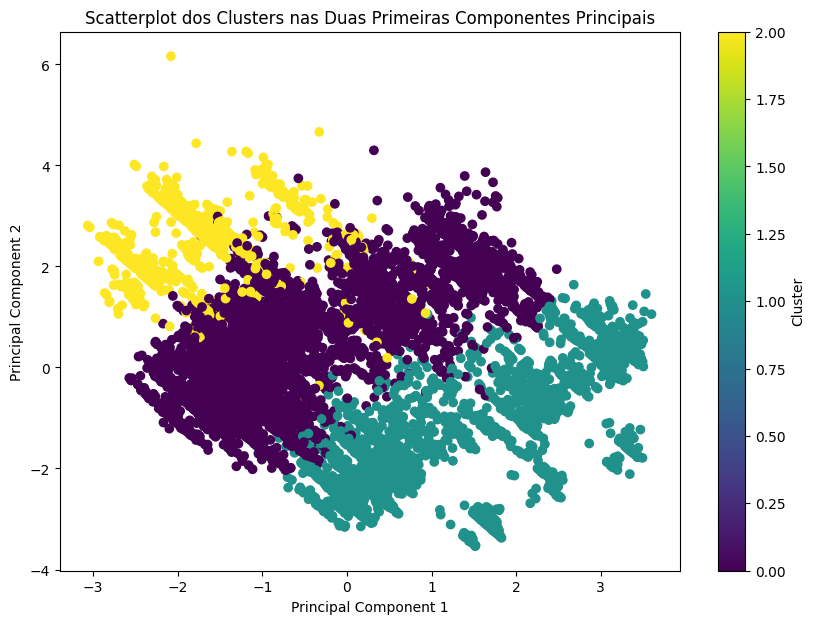

In [10]:
# Ex 4.b

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Carregar o dataset e selecionar as primeiras 8 features
data = pd.read_csv('accounts.csv')
features = data.iloc[:, :8]

# 2. Remover duplicados e valores nulos
features = features.drop_duplicates().dropna()

# 3. Aplicar get_dummies para variáveis categóricas
features = pd.get_dummies(features, drop_first=True)

# 4. Normalização dos dados
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# 5. Aplicar K-means com k=3
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(features_normalized)

# 6. Redução dimensional para 2D com PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_normalized)

# 7. Visualização do scatterplot dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Clusters in the First Two Principal Components')
plt.colorbar(label='Cluster')
plt.show()


# Ex 5.
Plot the cluster conditional features of the frequencies of "job" and "education" \
according to $k$-means, with $\texttt{multiple='dodge', stat='density', shrink=0.8, common\_norm=False}$. \
Analyse the frequency plots using $\texttt{sns.displot}$. \
Describe the main differences between the clusters in no more than half page.

> Refer to the report for the written answer

In [ ]:
# Ex 5
